# THỰC HÀNH 4: PHÂN VÙNG ẢNH

## 2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH

### 2.1. PHÂN VỪNG THEO HISTOGRAM

#### 2.1.1. PHUONG PHÁP OSTU

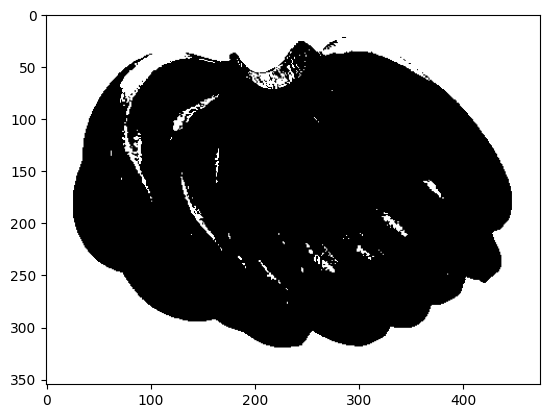

In [34]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import *
from scipy.ndimage import *

data = Image.open('fruit.JFIF').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b=a>thres
b=Image.fromarray(b)
plt.imshow(b, cmap='gray')
plt.show()

#### 2.1.2. PHƯƠNG PHÁP ADAPTIVE THRESHOLDING 

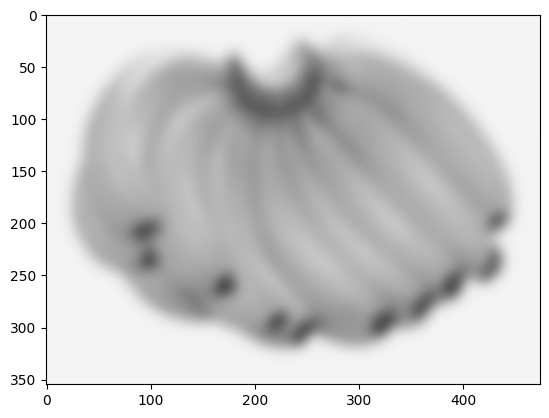

In [35]:
data=Image.open('fruit.jfif').convert('L')
a = np.asarray(data)
b=threshold_local(a, 39, offset=10)

b= Image.fromarray(b)
plt.imshow(b, cmap='gray')
plt.show()

### 2.2 PHÂN VÙNG THEO REGION

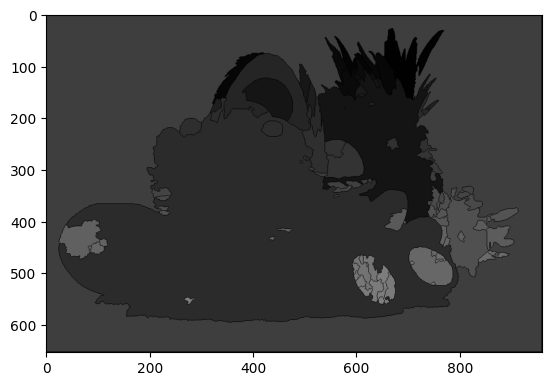

In [36]:
import cv2

data=cv2.imread('fruit1.jpg')
a=cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2=cv2.erode(b1, None, iterations = 2)
dist_trans = cv2.distanceTransform(b2, 2,3)
thresh, dt = cv2.threshold(dist_trans, 1,255,cv2.THRESH_BINARY)
labelled,ncc=label(dt)
labelled = labelled.astype(np.int32)
cv2.watershed(data, labelled)
b=Image.fromarray(labelled)
plt.imshow(b, cmap='gray')
plt.show()

### 2.3. BIẾN ĐỔI ĐỐI TƯỢNG TRONG ẢNH

#### 2.3.1. SỬ DỤNG BINARY_DILATION

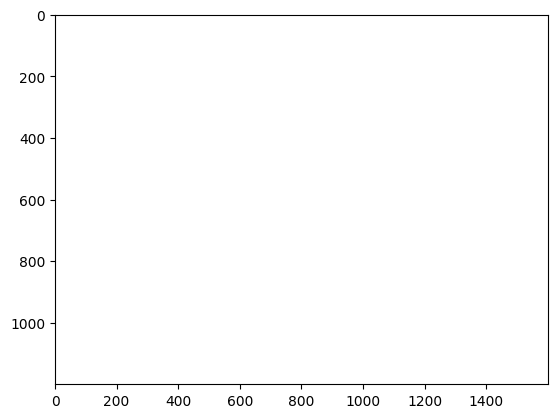

In [37]:
data=Image.open('dil_img.gif').convert('L')
b=nd.binary_dilation(data, iterations=50)

c=Image.fromarray(b)
# c.show()
plt.imshow(c, cmap='gray')
plt.show()

#### 2.3.2. SỬ DỤNG BINARY_OPENING

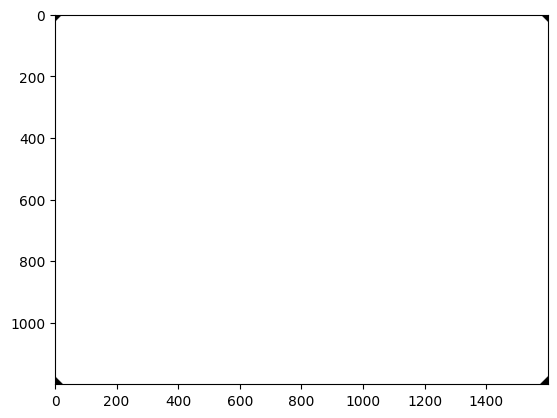

In [38]:
data =Image.open('dil_img.gif').convert('L')
a=np.array(data)
s= [[0,1,0], [1,1,1],[0,1,0]]
b= nd.binary_opening(a>0, structure=s, iterations=25)
b_uint8 = b.astype(np.uint8) * 255
c=Image.fromarray(b)
#c.show()
plt.imshow(b_uint8,cmap='gray')
plt.show()

#### 2.3.3. SỬ DỤNG BINARY_EROSION

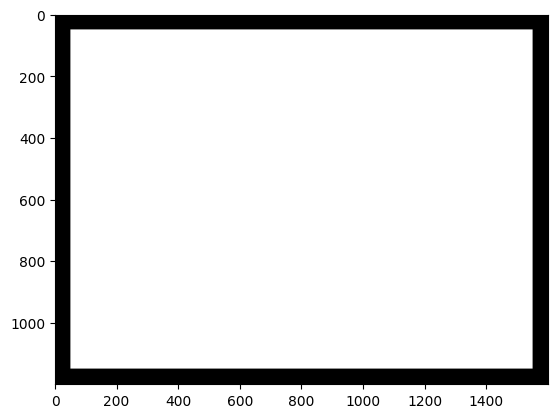

In [39]:
data = Image.open('dil_img.gif').convert('L')
s=[[0,1,0],[1,1,1],[0,1,0]]
b=nd.binary_erosion(data, structure=s, iterations=50)
c=Image.fromarray(b)
plt.imshow(c)
plt.show()

#### 2.3.4. SỬ DỤNG BINARY_CLOSING

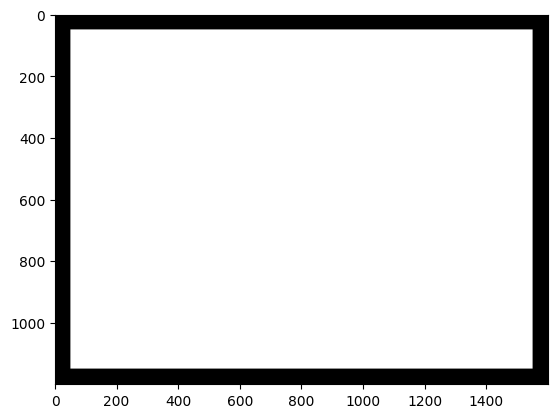

In [40]:
data=Image.open('dil_img.gif').convert('L')
s=[[0,1,0],[1,1,1],[0,1,0]]
b=nd.binary_closing(data, structure=s, iterations=50)
c=Image.fromarray(b)
plt.imshow(c)
plt.show()

## 3.BÀI TẬP

### 1.

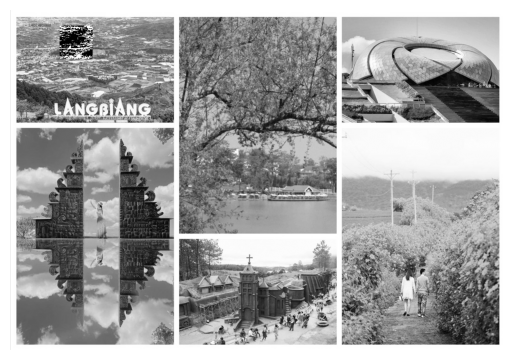

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from skimage.filters import threshold_otsu


data = Image.open('exercise/dalat.jpg').convert('L')
a = np.asarray(data)

roi = a[50:150, 50:150]

x_new = 50 + 100  # Dịch sang phải 100px

thres = threshold_otsu(roi)
binary_roi = roi > thres
binary_roi = (binary_roi * 255).astype(np.uint8)  

result = a.copy()
result[50:150, x_new:x_new+100] = binary_roi

plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

Image.fromarray(result).save('lang_biang.jpg')


### 2.


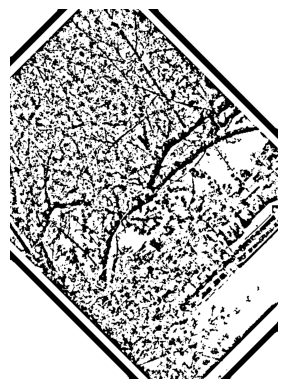

Ảnh đã lưu thành công với tên ho_xuan_huong.jpg


In [42]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage.filters import threshold_local
from PIL import Image

image = cv2.imread("exercise/dalat.jpg", cv2.IMREAD_GRAYSCALE)

cropped = image[10:700, 500:1000]

(h, w) = cropped.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(cropped, M, (w, h), flags=cv2.INTER_LINEAR)

block_size = 39  
adaptive_thresh = threshold_local(rotated, block_size, offset=10)
binary_adaptive = rotated > adaptive_thresh

result_image = Image.fromarray((binary_adaptive * 255).astype(np.uint8))

result_image.save("ho_xuan_huong.jpg")
plt.imshow(result_image, cmap='gray')
plt.axis('off')
plt.show()
print("Ảnh đã lưu thành công với tên ho_xuan_huong.jpg")


### 3.


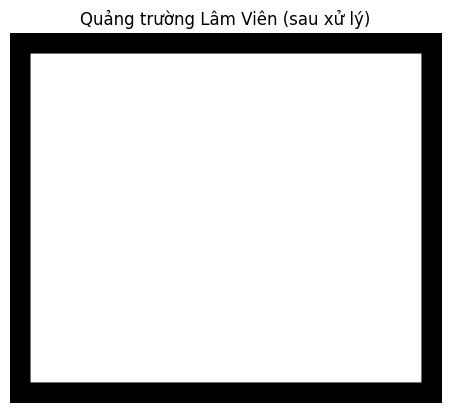

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import cv2

data=Image.open('dil_img.gif').convert('L')
a = np.asarray(data) 
roi = a[0:180, 430:640]

m= np.fliplr(roi)  

s = [[0,1,0], [1,1,1], [0,1,0]]
c = nd.binary_closing(m, structure=s, iterations=10)
c_img = (c * 255).astype(np.uint8)

result = Image.fromarray(c_img)
result.save('quan_truong_lam_vien.jpg')

plt.imshow(result, cmap='gray')
plt.axis('off')
plt.title("Quảng trường Lâm Viên (sau xử lý)")
plt.show()


### 4.


=== MENU ===
geometric_transformation: coordinate_mapping, rotate, scale, shift
segment: adaptive_thresholding, binary_dilation, binary_erosion, otsu
Nhap 1 hoac 2 chuc nang (vd: rotate hoac rotate,otsu):


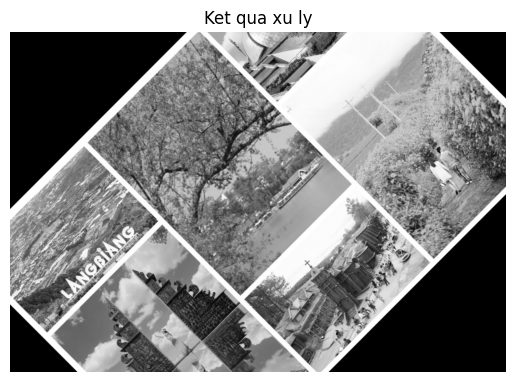

Da luu anh: ket_qua_xu_ly.jpg


In [44]:
import cv2
import numpy as np
from skimage.filters import threshold_local, threshold_otsu
from scipy.ndimage import binary_dilation, binary_erosion
import matplotlib.pyplot as plt
from PIL import Image

def coordinate_mapping(img):
    return np.fliplr(img)

def rotate(img, angle=45):
    h, w = img.shape
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))

def scale(img, fx=1.5, fy=1.5):
    return cv2.resize(img, None, fx=fx, fy=fy)

def shift(img, dx=50, dy=30):
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    h, w = img.shape
    return cv2.warpAffine(img, M, (w, h))

def adaptive_thresholding(img):
    thresh = threshold_local(img, block_size=39, offset=10)
    return (img > thresh) * 255

def otsu_thresholding(img):
    thresh = threshold_otsu(img)
    return (img > thresh) * 255

def binary_dilation_seg(img):
    return binary_dilation(img, structure=np.ones((3,3))) * 255

def binary_erosion_seg(img):
    return binary_erosion(img, structure=np.ones((3,3))) * 255

img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_GRAYSCALE)

print("=== MENU ===")
print("geometric_transformation: coordinate_mapping, rotate, scale, shift")
print("segment: adaptive_thresholding, binary_dilation, binary_erosion, otsu")
print("Nhap 1 hoac 2 chuc nang (vd: rotate hoac rotate,otsu):")
choices = input("Nhap lua chon cua ban: ").lower().split(",")

result = img.copy()

for choice in choices:
    choice = choice.strip()
    if choice == "coordinate_mapping":
        result = coordinate_mapping(result)
    elif choice == "rotate":
        result = rotate(result)
    elif choice == "scale":
        result = scale(result)
    elif choice == "shift":
        result = shift(result)
    elif choice == "adaptive_thresholding":
        result = adaptive_thresholding(result)
    elif choice == "otsu":
        result = otsu_thresholding(result)
    elif choice == "binary_dilation":
        result = binary_dilation_seg(result)
    elif choice == "binary_erosion":
        result = binary_erosion_seg(result)
    else:
        print(f"Khong hop le: {choice}")

if result.max() <= 1:
    result = (result * 255).astype(np.uint8)
elif result.max() <= 255 and result.dtype != np.uint8:
    result = result.astype(np.uint8)

plt.imshow(result, cmap='gray')
plt.title("Ket qua xu ly")
plt.axis('off')
plt.show()

Image.fromarray(result).save("ket_qua_xu_ly.jpg")
print("Da luu anh: ket_qua_xu_ly.jpg")
